In [1]:
import pandas as pd
import sys
import os
sys.path.append('../scripts')

files = [file for file in os.listdir('../data/') if not file.startswith('.')]
files

['2000.xlsx',
 '2001.xlsx',
 '2002.xlsx',
 '2003.xlsx',
 '2004.xlsx',
 '2005.xlsx',
 '2006.xlsx',
 '2007.xlsx',
 '2008.xlsx',
 '2009.xlsx',
 '2010.xlsx',
 '2011.xlsx',
 '2012.xlsx',
 '2013.xlsx',
 '2014.xlsx',
 '2015.xlsx',
 '2016.xlsx',
 '2017.xlsx',
 '2018.xlsx',
 '2019.xlsx',
 '2020.xlsx',
 '2021.xlsx',
 '2022.xlsx',
 '2023.xlsx',
 'cleaned_data']

In [2]:
data = pd.read_excel('../data/2000.xlsx', sheet_name='By-HS6Product')

print(data)

           Reporter TradeFlow  ProductCode           Product Description  \
0     United States    Import       760120  Aluminium unwrought, alloyed   
1    European Union    Import       760120  Aluminium unwrought, alloyed   
2           Germany    Import       760120  Aluminium unwrought, alloyed   
3             Japan    Import       760120  Aluminium unwrought, alloyed   
4             Italy    Import       760120  Aluminium unwrought, alloyed   
..              ...       ...          ...                           ...   
113       Nicaragua    Import       760120  Aluminium unwrought, alloyed   
114            Oman    Import       760120  Aluminium unwrought, alloyed   
115         Andorra    Import       760120  Aluminium unwrought, alloyed   
116          Zambia    Import       760120  Aluminium unwrought, alloyed   
117         Senegal    Import       760120  Aluminium unwrought, alloyed   

     Year Partner  Trade Value 1000USD      Quantity Quantity Unit  
0    2000   World 

In [3]:
data.describe()

,ProductCode,Year,Trade Value 1000USD,Quantity
count,118.0,118.0,1.180000e+02,1.140000e+02
mean,760120.0,2000.0,1.180842e+05,7.216184e+07
std,0.0,0.0,3.689370e+05,2.288707e+08
min,760120.0,2000.0,2.000000e-02,1.000000e+01
25%,760120.0,2000.0,3.289000e+01,1.851875e+04
50%,760120.0,2000.0,3.191150e+03,1.717750e+06
75%,760120.0,2000.0,4.924640e+04,2.978380e+07
max,760120.0,2000.0,2.609966e+06,1.581350e+09


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Reporter             118 non-null    object 
 1   TradeFlow            118 non-null    object 
 2   ProductCode          118 non-null    int64  
 3   Product Description  118 non-null    object 
 4   Year                 118 non-null    int64  
 5   Partner              118 non-null    object 
 6   Trade Value 1000USD  118 non-null    float64
 7   Quantity             114 non-null    float64
 8   Quantity Unit        114 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 8.4+ KB


In [6]:
from data_cleaning import join_data, clean_data

#join all files
data = join_data(files)

data

,Countries,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Albania,10986,3820,17295,431304,1414170,6626570,6657230,7366140,7459860,...,315951,6457170,10317200,255510,567811,58319,3174200,243282,3591600,12175400
1,Algeria,5901620,3955480,2509510,1571480,980651,1172840,1317240,1776110,1385130,...,10922900,13048800,13723700,14313600,NaN,NaN,NaN,NaN,NaN,NaN
2,Andorra,207,NaN,45,2060,412,NaN,NaN,21,39,...,5,5,NaN,NaN,50,27,10,NaN,10,NaN
3,Angola,NaN,NaN,NaN,NaN,NaN,3524,25850,6114,120537,...,49327,112614,NaN,NaN,397239,467067,416345,204977,142855,100837
4,Antigua and Barbuda,737,NaN,NaN,NaN,NaN,NaN,NaN,613,NaN,...,NaN,NaN,NaN,96,NaN,NaN,NaN,30,13,772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Venezuela,623135,387483,290387,205643,226745,290886,153387,75280,521329,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,Vietnam,327787,572213,1791910,15023400,32419700,36563100,49214800,47107900,53959600,...,168642000,169722000,194280000,214301000,210444000,239895000,234978000,257012000,199389000,NaN
190,Yemen,NaN,NaN,NaN,NaN,716,2000,73549,123765,48994,...,NaN,NaN,NaN,NaN,1008,4860,NaN,NaN,NaN,NaN
191,Zambia,170,133,1460,3000,3,93300,8613,26305,8147,...,30013,56088,22538,14203,68722,13851,31513,17583,26255,23606


In [8]:
#remove unwanted columns, filter desired countries and interpolate missing values
countries = ['United States', 'Italy', 'Germany', 'France', 'Portugal', 'United Kingdom', 'China', 'Spain', 'Japan']
cleaned_data = clean_data(data, countries)
cleaned_data

,Countries,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
35,China,299276000,303256000,311193000,335649000,335393000,209477000,222095000,170772000,138460000,...,85997700,70776600,68647100,69957200,74479500,215910000,1234750000,1154620000,1278050000,1132330000
64,France,337326000,324413000,325981000,324997000,369796000,366402000,394956000,443775000,395784000,...,384952000,364321000,417895000,400150000,426214000,389028000,351842000,351842000,351842000,351842000
69,Germany,975753000,1026310000,991695000,1099140000,1170880000,1180240000,1419890000,1444290000,1418540000,...,1832000000,1807480000,1850680000,1898500000,1808930000,1620695000,1432460000,1667700000,1726740000,1550530000
87,Italy,329708000,368761000,407814000,453088000,472755000,470487000,506986000,552772000,440997000,...,583722000,553079000,610722000,648293000,662190000,664841000,528287000,719486000,716297000,546987000
89,Japan,941611000,796094000,848330000,899215000,971488000,989418000,1137420000,1128710000,1169440000,...,1125460000,1070040000,1102930000,1192885000,1282840000,1082738000,882636000,1134670000,1055750000,1077760000
143,Portugal,188701000,170378000,168535000,186494000,200367000,225242000,238483000,221748000,216588000,...,74503600,76509000,86409000,102983000,127352000,120644500,113937000,117142000,120347000,127754000
160,Spain,146529000,160822000,175115000,168244000,235154000,228322000,281185000,334048000,283373000,...,243822666,258849000,362439000,384385000,406331000,406331000,406331000,406331000,406331000,406331000
183,United Kingdom,171298000,225323000,162782000,140942000,124931000,91875300,127546000,95038300,97179500,...,62549300,72818200,76094400,76489100,70375400,70375400,70375400,70375400,70375400,70375400
184,United States,1581350000,1240320000,1547450000,1279400000,1548730000,1870400000,1796280000,1490980000,1312510000,...,1795210000,1929650000,2017680000,2124690000,2151614000,2178538000,2205462000,2232386000,2259310000,1765130000


<BarContainer object of 9 artists>

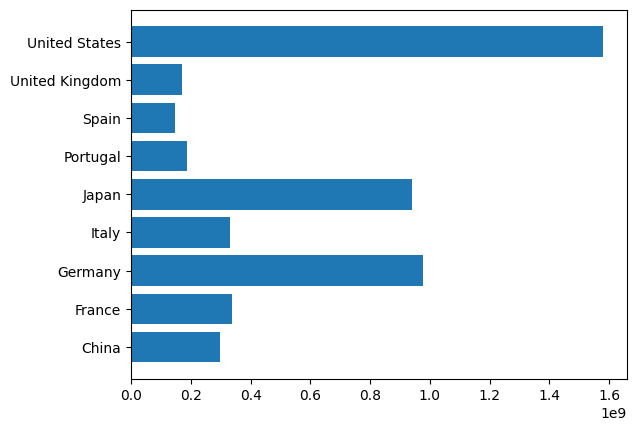

In [22]:
import matplotlib.pyplot as plt

plt.barh(y=cleaned_data['Countries'], width=cleaned_data['2000'])